# Ch04 圖解神經網路-多層感知器(MLP)

複習一下公式 : $z = (\sum_{i=1}^n w_ix_i)+b$

## 4-1 線性不可分問題
簡單來說: 線性不可分的問題就是無法解決不能用一條線將資料分成兩類的問題. 
圓點是1; 方塊是0;
使用單一感知器並無法解決這種問題, 因此需要使用多層感知器來解決線性不可分的問題

## 4-2 認識多層感知器(MLP)
事實上就是神經網路

### 4-2-1 使用二層感知器解決XOR問題
真值表

| x1 | x2 | out |
|:----:|:----:|:----:|
| 0 | 0 | 0 | 
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 0 | 

所以用二個感知器 `h1()` 和 `h2()` 函數

$h1(x1, x2) = x1 + x2 - 0.5$

$h2(x1, x2) = x1 + x2 - 1.5$

複習 : wx + b > 0 ==> 1

`h1()` 函數所得如下

$h1(0,0) = f(1*0+1*0-0.5) = f(-0.5) = 0$

$h1(0,1) = f(1*0+1*1-0.5) = f(0.5) = 1$

$h1(1,0) = f(1*1+1*0-0.5) = f(0.5) = 1$

$h1(1,1) = f(1*1+1*1-0.5) = f(1.5) = 1$

得到的是OR_GATE

`h2()` 函數所得如下

$h2(0,0) = f(1*0+1*0-1.5) = f(-0.5) = 0$

$h2(0,1) = f(1*0+1*1-1.5) = f(0.5) = 0$

$h2(1,0) = f(1*1+1*0-1.5) = f(0.5) = 0$

$h2(1,1) = f(1*1+1*1-1.5) = f(1.5) = 1$

得到的是 AND_GATE

現在, 建立新函數 `o1(h1, h2)`

$(x1, x2) = (0, 0) --> o1(h1, h2) = (0, 0)$

$(x1, x2) = (0, 1) --> o1(h1, h2) = (1, 0)$

$(x1, x2) = (1, 0) --> o1(h1, h2) = (1, 0)$

$(x1, x2) = (1, 1) --> o1(h1, h2) = (1, 1)$

調整權重w1=1, w2=-2, bias=-0.5 , 輸出結果如下

$(x1, x2) = (0, 0) --> o1(h1, h2) = (0, 0) --> f(1*0-2*0-0.5) = f(-0.5) = 0 $

$(x1, x2) = (0, 1) --> o1(h1, h2) = (1, 0) --> f(1*1-2*0-0.5) = f(0.5) = 0 $

$(x1, x2) = (1, 0) --> o1(h1, h2) = (1, 0) --> f(1*1-2*0-0.5) = f(0.5) = 0 $

$(x1, x2) = (1, 1) --> o1(h1, h2) = (1, 1) --> f(1*1-2*1-0.5) = f(-1.5) = 0 $



In [3]:
#XOR 二層感知器
#Ch4_2_1.py
import numpy as np

class Perceptron:
    def __init__(self,input_length, weights=None, bias=None):
        if weights is None:
            self.weights = np.ones(input_length)*1
        else:
            self.weights = weights
        
        if bias is None:
            self.bias = -1
        else:
            self.bias = bias

    @staticmethod
    def activation_function(x):
        if x > 0:
            return 1
        return 0

    def __call__(self, input_data):
        w_input = self.weights * input_data
        w_sum = w_input.sum() + self.bias
        return Perceptron.activation_function(w_sum), w_sum

weights = np.array([1,1])
bias = -0.5
h1 = Perceptron(2, weights, bias)

weights = np.array([1,1])
bias = -1.5
h2 = Perceptron(2, weights, bias)

weights = np.array([1,-2])
bias = -0.5
o1 = Perceptron(2, weights, bias)

input_data = [np.array([0,0]), np.array([0,1]),
              np.array([1,0]), np.array([1,1])]

for x in input_data:
    out1, w1 = h1(np.array(x))
    out2, w2 = h2(np.array(x))
    print(out1,w1,out2,w2)
    new_point = np.array([w1, w2])
    new_input = np.array([out1,out2])
    out, w = o1(new_input)
    print(x, new_point, new_input, w, out)

0 -0.5 0 -1.5
[0 0] [-0.5 -1.5] [0 0] -0.5 0
1 0.5 0 -0.5
[0 1] [ 0.5 -0.5] [1 0] 0.5 1
1 0.5 0 -0.5
[1 0] [ 0.5 -0.5] [1 0] 0.5 1
1 1.5 1 0.5
[1 1] [1.5 0.5] [1 1] -1.5 0


### 4-2-2 多層感知器就是神經網路
如果多層感知器有 2 層隱藏層, 共 4 層神經網路, 這就是深度神經網路, 即深度學習.

神經網路的每一層神經層, 其每一個頂點都會連接下一層的所有頂點, 稱為**全連接(Full Connected)**, 這種神經層稱為**密集層(Dense Layer)**, 而這種神經網路稱為**密集連接神經網路(Dense Connected Neural Network)**

## 4-3 神經網路的學習過程-正向與反向傳播

### 4-3-1 神經網路的學習方式與學習目標

神經網路的學習目標就是找出正確方權重值來縮小損失(Loss, 也就是實際值與預測值之間的差距), 這些權重也稱為神經網路的**參數**



### 神經網路的訓練迴圈
1. 初始權重值
2. 使用正向傳播計算預測值
3. 評估預測值與真實值誤差的損失
4. 使用反向傳播計算更新權限的比例
5. 更新權重繼續下一次訓練



## 4-4 啟動函數與損失函數

* Sigmoid 函數

$f(x) = \frac {1}{1+e^{-x}}$

一條值在 0~ 1之間的曲線


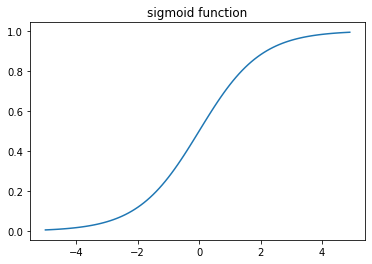

In [11]:
# Sigmoid function
# Ch4_4_1.py

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-5,5,0.1)

plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


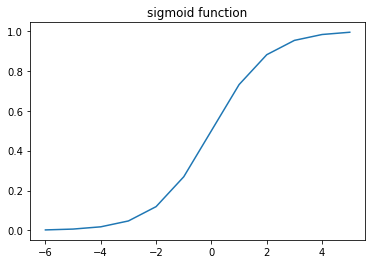

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-6,6) #產生-6~5的list
print(x)
plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

x = np.arange(-6,6,0.1) 曲線比較圓 

$\frac{\partial f(x)}{\partial x} = (\frac {1}{1+e^{-x}})' = ((1+e^{-x})^{-1})' = (e^{-x})(1+e^{-x})^{-2}$  

參考網址 : en.wikipedia.ort/wiki/Activation_function

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]


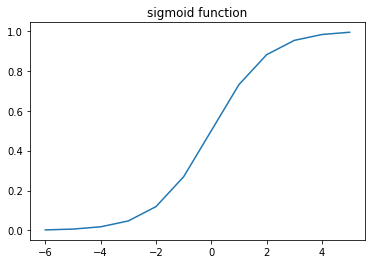

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+(np.e**(-x)))  

x = np.arange(-6,6) #產生-6~5的list
print(x)
plt.plot(x,sigmoid(x))
plt.title("sigmoid function")
plt.show()

### 4-4-1 啟動函數 - ReLU函數

$ f(x) = max(0,x)$

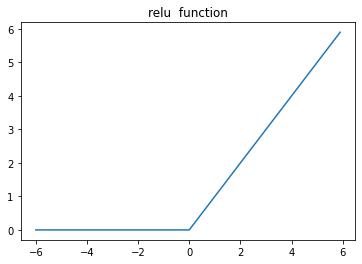

In [3]:
# ReLU
# Ch4_4_1a.py

import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0,x)

x = np.arange(-6,6,0.1)

plt.plot(x,relu(x))
plt.title("relu  function")
plt.show()

Tanh函數 pyperbolic tangent

$f(x) = \frac {sinh(x)}{cosh(x)}$

輸出範圍是在-1~1之間 

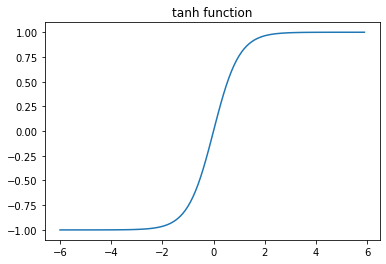

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return np.tanh(x)

x = np.arange(-6, 6, 0.1)

plt.plot(x, tanh(x))
plt.title("tanh function")
plt.show()


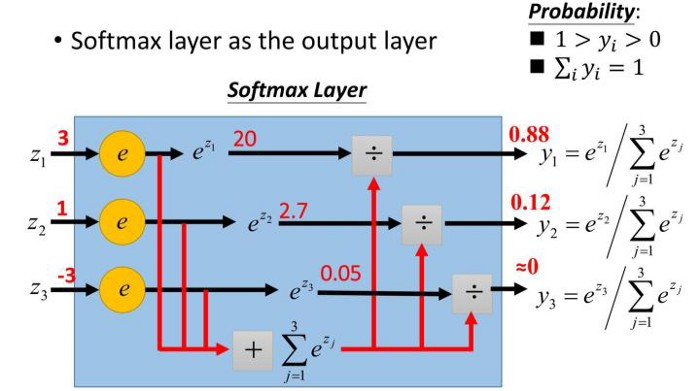

* 機率, 0~1
* e的次方, 都是正數
* e是指數, 具放大

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

x = np.array([1,2,3,4,1,2,3])

y = softmax(x)
print(y)

#plt.plot(x,softmax(x))
#plt.title("softmax  function")
#plt.show()

[0.02364054 0.06426166 0.1746813  0.474833   0.02364054 0.06426166
 0.1746813 ]


### 4-4-2 損失函數 Loss Function

* 均方誤差 Mean Square Error

簡稱 MSE ，計算預測值和真實值之間的差異平方，其公式如下

$E = \frac {1}{2} \sum_n (y_n-t_n)^2$

y 是輸出的預設值， t 是目標值，在相減後計算平方和，平方的目的是為了避免負值，最後乘以 1/2 ，就是均方誤差。


In [1]:
import numpy as np

def MSE(y, t):
    return 0.5*np.sum((y-t)**2)

y_data = np.array([0.5,2.1,1.5,3.8,0.7,1.8,3.4])
t_data = np.array([1,2,3,4,1,2,3])

print(MSE(y_data, t_data))


1.42


* 交叉熵(Cross-Entropy)

資訊量 : 是使用對數 `log` 表示, $log_{2} 0.5 = log_{2}  2^{-1} = -1$

$H(X_{i}) = -log_{2} P$

* 資訊熵(Information Entropy)

$H(X) = - \sum_x P(x) log_{2}P(x)$

* 交叉熵

$H(X,Y) = - \sum_{i=1}^n P(x_{i}) log_{2}P(Y_{i})$

* 梯度下降法的數學公式

$w^1 = w^0 - \alpha \frac {\partial L(w)}{\partial w^0}$

單變數函數 : $L(w)= w^2$

函數的微分 : $\frac {\partial L(w)}{\partial w} = 2w $

假設：$w^0$ 是 5，學習率是 0.4，運算如下

$w^0 = 5$

$w^1 = w^0 - \alpha \frac {\partial L(w)}{\partial w^0} = 5 - 0.4*10 = 1$

$w^2 = w^1 - \alpha \frac {\partial L(w)}{\partial w^1} = 1 - 0.4*2 = 0.2$

$w^3 = 0.04$

$w^4 = 0.008$

$w^5 = 0.0016$


[5.         3.         1.8        1.08       0.648      0.3888
 0.23328    0.139968   0.0839808  0.05038848 0.03023309]


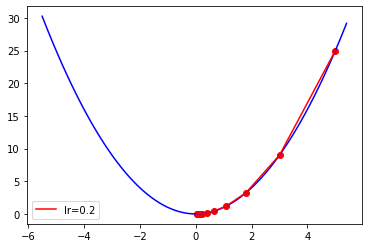

In [11]:
#單變數函數的梯度下降法實例
#Ch4_5_1.py

import numpy as np
import matplotlib.pyplot as plt

def L(w): 
    return w * w

def dL(w):
    return 2 * w

def gradient_descent(w_start, df, lr, epochs):    
    w_gd = []
    w_gd.append(w_start) 
    pre_w = w_start   
    
    for i in range(epochs):         
        w = pre_w - lr * df(pre_w)      
        w_gd.append(w)    
        pre_w = w
    return np.array(w_gd)

w0 = 5   
epochs = 10
lr = 0.2
w_gd = gradient_descent(w0, dL, lr, epochs) 
print(w_gd)

t = np.arange(-5.5, 5.5, 0.1)
plt.plot(t, L(t), c='b')
plt.plot(w_gd, L(w_gd), c='r', label='lr={}'.format(lr))    
plt.scatter(w_gd, L(w_gd), c='r')    
plt.legend()
plt.show()

**多變數函數的梯度下降法實例**

* 雙變數函數：$L(w_1,w_2) = {w_1}^2+{w_2} ^2$ 

* 函數的微分是向量：$[\frac {\partial L(w_1,w_2}{\partial w_1},\frac {\partial L(w_1,w_2)}{\partial w_2}] = [2w_1,2w_2]$

假設：起點 $w^0$ 是 [2,4] 學習率是 0.1，運算如下

$w^0 = [2,4]$

$w^1 = w^0 - \alpha* \frac {\partial L(w_1,w_2）}{\partial w^0} = [2,4] - 0.1*[4,8] = [1.6,3.2]$

$w^2 = w^1 - \alpha* \frac {\partial L(w_1,w_2）}{\partial w^1} = [1.6,3.2] - 0.1*[3.2,6.4] = [1.28,2.56]$

$w^3 = [1.024,2.048]$

$w^4 = [0.8192,1.6384]$

$w^3 = [0.65536,1.31072]$

...

$w^40 = [2.65845599e-04,5.31691198e-04]$


[[2.00000000e+00 4.00000000e+00]
 [1.60000000e+00 3.20000000e+00]
 [1.28000000e+00 2.56000000e+00]
 [1.02400000e+00 2.04800000e+00]
 [8.19200000e-01 1.63840000e+00]
 [6.55360000e-01 1.31072000e+00]
 [5.24288000e-01 1.04857600e+00]
 [4.19430400e-01 8.38860800e-01]
 [3.35544320e-01 6.71088640e-01]
 [2.68435456e-01 5.36870912e-01]
 [2.14748365e-01 4.29496730e-01]
 [1.71798692e-01 3.43597384e-01]
 [1.37438953e-01 2.74877907e-01]
 [1.09951163e-01 2.19902326e-01]
 [8.79609302e-02 1.75921860e-01]
 [7.03687442e-02 1.40737488e-01]
 [5.62949953e-02 1.12589991e-01]
 [4.50359963e-02 9.00719925e-02]
 [3.60287970e-02 7.20575940e-02]
 [2.88230376e-02 5.76460752e-02]
 [2.30584301e-02 4.61168602e-02]
 [1.84467441e-02 3.68934881e-02]
 [1.47573953e-02 2.95147905e-02]
 [1.18059162e-02 2.36118324e-02]
 [9.44473297e-03 1.88894659e-02]
 [7.55578637e-03 1.51115727e-02]
 [6.04462910e-03 1.20892582e-02]
 [4.83570328e-03 9.67140656e-03]
 [3.86856262e-03 7.73712525e-03]
 [3.09485010e-03 6.18970020e-03]
 [2.475880

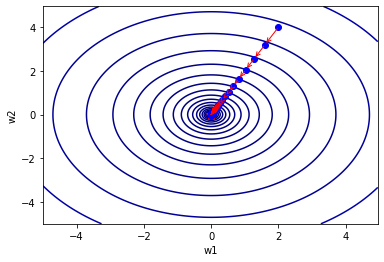

In [12]:
#Ch4_5_1a.py

import numpy as np
import matplotlib.pyplot as plt

def L(w1, w2):
    return w1**2 + w2**2

def dL(w):
    return np.array([2*w[0], 2*w[1]])

def gradient_descent(w_start, df, lr, epochs):
    w1_gd = []
    w2_gd = []
    w1_gd.append(w_start[0])
    w2_gd.append(w_start[1]) 
    pre_w = w_start

    for i in range(epochs):
        w = pre_w - lr*df(pre_w)
        w1_gd.append(w[0])
        w2_gd.append(w[1])
        pre_w = w

    return np.array(w1_gd), np.array(w2_gd)

w0 = np.array([2, 4])
lr = 0.1
epochs = 40

x1 = np.arange(-5, 5, 0.05)
x2 = np.arange(-5, 5, 0.05)

w1, w2 = np.meshgrid(x1, x2)

fig1, ax1 = plt.subplots()
ax1.contour(w1, w2, L(w1, w2), levels=np.logspace(-3, 3, 30), cmap='jet')
min_point = np.array([0., 0.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_, L(*min_point_), 'r*', markersize=10)
ax1.set_xlabel('w1')
ax1.set_ylabel('w2')

w1_gd, w2_gd = gradient_descent(w0, dL, lr, epochs)
w_gd = np.column_stack([w1_gd, w2_gd])
print(w_gd)

ax1.plot(w1_gd, w2_gd, 'bo')
for i in range(1, epochs+1):
    ax1.annotate('', xy=(w1_gd[i], w2_gd[i]), 
                   xytext=(w1_gd[i-1], w2_gd[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
plt.show()




### 4-5-2 反向傳播演算法 Backpropagation

整個演算法分三個階段
* 前向傳播階段
* 反向傳播階段
* 權重更新階段

**啟動函數改用 `Sigmoid` 函數** , 只有 0~1

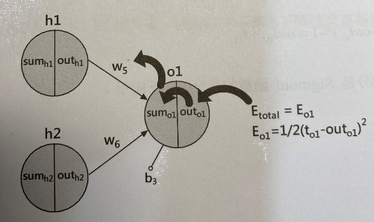

上圖 `sum` 是前一層 $wx+b$ 的值， `out` 是啟動函數 $f(wx+b)$ 的輸出， `E` 是使用均方誤差損失函數計算出的損失分數， `t` 是目標值，因為輸出層只有一個 `o1` 神經元，所以損失分數的總和 $E_{total}$ 就是 $E_{o1}$ ，如果輸出層有多個神經元，就是各神經元損失的總和，例如：輸出層有 2 個神經元 $E_{o1}$ 和 $E_{o2}$ ， $E_{total}$ 就是 $E_{o1} + E_{o2}$

計算 $w_5$ 的梯度，即反向依序從 $E_{total}  \rightarrow  out_{01}  \rightarrow  sum_{o1}  \rightarrow  w_5$

其連鎖率的微分運算式，如下

$\frac {\partial E_{total}}{\partial w_5} = \frac {\partial E_{total}}{\partial out_{o1}}*\frac {\partial out_{o1}}{\partial sum_{o1}}*\frac {\partial sum_{o1}}{\partial w_5}$

上述微分運算式共分成三部份，

**第一部份：**再使用連鎖率拆成2個如下：

$\frac {\partial E_{total}}{\partial out_{o1}} = \frac {\partial \frac{1}{2}(t_{o1}-out_{o1})^2}{\partial out_{o1}} = \frac {\partial E_{total}}{\partial out_{o1}} = \frac {\partial \frac{1}{2}(t_{o1}-out_{o1})^2}{\partial (t_{o1}-out_{o1})}* \frac {\partial (t_{o1}-out_{o1})}{\partial out_{o1}}$

= $2 * \frac {1}{2}(t_{o1}-out_{o1})^{2-1} * \frac {\partial (t_{o1}-out_{o1})}{\partial out_{o1}}$

= $(t_{o1}-out_{o1}*-1)$ = $out_{o1}-t_{o1}$

**第二部份：**是 `Sigmoid` 函數的微分，如下所示：

$out_{o1} = \frac {1}{( 1 + e^{ -sum_{o1} }　)}$

$\frac {\partial out_{o1}}{\partial sum_{o1}} = \frac {\partial}{\partial sum_{o1}} \frac {1}{( 1 + e^{ -sum_{o1} }　)} = \frac{\partial (1+e^{-sum_{ o1 }}　)^{-1}}{\partial sum_{o1}} = out_{o1}*(1-out_{o1})$

最後一部份，是計算 `wx+b` 的微分，如下所示：

$sum_{o1} = w_5 * out_{h1} + w_6 * out_{h2} + b_3$

$\frac {\partial sum_{o1}}{\partial w_5} = \frac {\partial (w_5 * out_{h1} + w_6 * out_{h2} + b_3)}{\partial w_5} = out_{h1}$

計算出權重 $w_5$ 的梯度，如下所示：

$\frac {\partial E_{total}}{\partial w_5} = (out_{o1} - t_{o1}) * (out_{o1}*(1-out_{o1})) * (out_{h1})$

再使用梯度下降法來更新權重 w 成為 w+ ， $\alpha$ 是學習率，如下所示：

$w+ = w_5 - \alpha * \frac {\partial E_{total}}{\partial w_5}$

複習 : 

$(e^{-x})' = -e^{-x}$ 
    
$(e^{x})' = e^x$

$ ((3x^2+5x+8)^3)' = \frac {\partial (3x^2+5x+8)^3}{\partial (3x^2+5x+8)} \frac {\partial(3x^2+5x+8)}{\partial x} = 3(3x^2+5x+8)^2)(6x+5)$

## 4-6 神經網路的樣本和標籤資料

樣本是用來訓練神經網路的資料集, 標籤是每一個樣本對應的真實標值, 這些資料都是不同維度的張量

### 4-6-1 標籤資料 - One-hot編碼 

把它變向量, 只有1是真實值



In [1]:
#Ch4_6_1.py

import numpy as np

def one_hot_encoding(raw, num):
    result = []
    for ele in raw:
        arr = np.zeros(num)
        np.put(arr, ele, 1)
        result.append(arr)
        
    return np.array(result)
    
digits = np.array([1, 8, 5, 4])

one_hot = one_hot_encoding(digits, 10)
print(digits)
print(one_hot)


[1 8 5 4]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### 4-6-2 樣本資料 - 特徵標準化 

在送入神經網路訓練前，需要執行特徵標準化，並且將樣本切割成訓練、驗證和測試資料集，和決定訓練週期、批次與批次尺寸。

平衡特徵值的貢獻，主要有兩種方法：

* 正規化 : 將資料**縮放**到0 ~ 1 之間，沒有極端的最大或最小值適用之。
* 標準化 : 將資料**轉換**成平均值為 0 、標準差是 1 ，如果資料多雜訊，且存在極端值適用之。


**正規化 Normalization**

$ X_{norm} = \frac {X - X_{min}}{X_{max}   - X_{min}}$


In [2]:
#Ch4_6_2.py

import numpy as np

def normalization(raw):
    max_value = max(raw)
    min_value = min(raw)
    norm = [(float(i)-min_value)/(max_value-min_value) for i in raw]
    return norm
    
x = np.array([255, 128, 45, 0])

print(x)
norm = normalization(x)
print(norm)
print(x/255)

[255 128  45   0]
[1.0, 0.5019607843137255, 0.17647058823529413, 0.0]
[1.         0.50196078 0.17647059 0.        ]


**標準化 Standardization **

$ X_{z分數} = \frac {X - 平均值}{標準差}$

In [3]:
#Ch4_6_2a.py

import numpy as np
from scipy.stats import zscore

x = np.array([255, 128, 45, 0])

z_score = zscore(x)
print(z_score)

print(zscore([[1, 2, 3],
              [6, 7, 8]], axis=1))

[ 1.52573266  0.21648909 -0.63915828 -1.10306348]
[[-1.22474487  0.          1.22474487]
 [-1.22474487  0.          1.22474487]]


**訓練, 驗證和測試資料集**

80%的資料是用來訓練, 20% 的資料是測試資料 